# EMD algorithm - Parameter experiments with a single trip

## Maria Inês Silva
## 26/01/2019

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# extendedMD code
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
from extendedMD.motif_viz import create_motif_table, plot_k_multdim_motifs

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'outputs/experiments_v3'))

In [3]:
def load_motif_data(folder):
    ts_1d = pickle.load(open(os.path.join(folder, "ts_1d.p"), "rb"))
    mdl_cost_list = pickle.load(open(os.path.join(folder, "mdl_cost.p"), "rb"))
    motif_point_list = pickle.load(open(os.path.join(folder, "motif_point.p"), "rb"))
    motif_center_list = pickle.load(open(os.path.join(folder, "motif_center.p"), "rb"))
    pattern_list = pickle.load(open(os.path.join(folder, "patterns.p"), "rb"))
    mean_dist = pickle.load(open(os.path.join(folder, "mean_dist.p"), "rb"))
    return ts_1d, mdl_cost_list, motif_point_list, motif_center_list, pattern_list, mean_dist

def load_ts_data(folder):
    trip_df = pd.read_pickle(os.path.join(folder, 'trip_df.pkl'))
    multi_dim_ts = trip_df[['ay', 'az']]
    events_ts = trip_df['event_type']
    return multi_dim_ts, events_ts

In [4]:
multi_dim_ts, events_ts = load_ts_data(data_folder)

***

## Experiment 1: Standard approach with adaptive break point in the SAX transformation

In [5]:
folder = os.path.join(output_folder, 'trip_exp1')
ts_1d, mdl_cost_list, motif_point_list, motif_center_list, pattern_list, mean_dist = load_motif_data(folder)
df1 = create_motif_table(pattern_list, motif_point_list, mdl_cost_list, mean_dist)
df1.head(10)

,pattern,pattern_len,n_members,mdl_cost,mean_dist
138,[acdd],1,128,60371.1,0.094457
31,[bbce],1,113,61278.9,0.093627
16,[edba],1,108,61480.2,0.119420
135,[ddca],1,105,61811.7,0.116655
34,[abde],1,100,62243.3,0.112964
169,[ecbb],1,102,62602.2,0.112793
103,[edab],1,91,62996.4,0.135753
125,[dbbd],1,78,63624.1,0.085549
183,[addc],1,92,63927.5,0.100737
42,[cccc],1,90,63956.7,0.090100


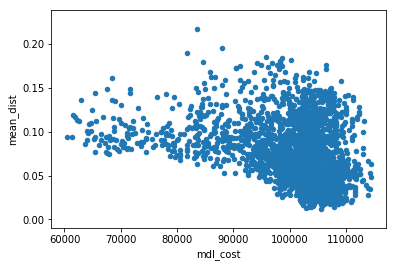

In [6]:
df1.plot.scatter('mdl_cost', 'mean_dist')
plt.show()

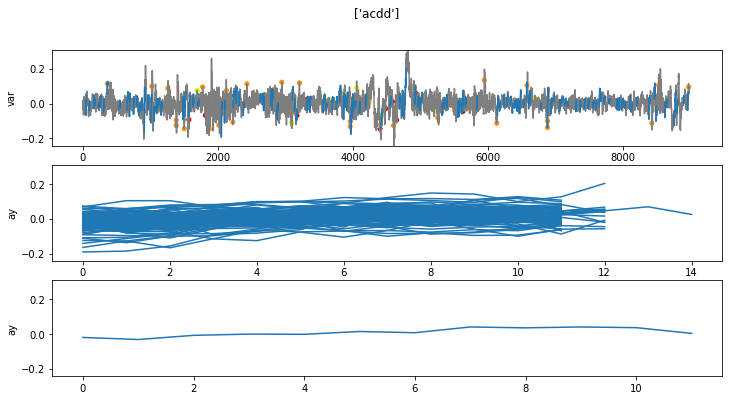

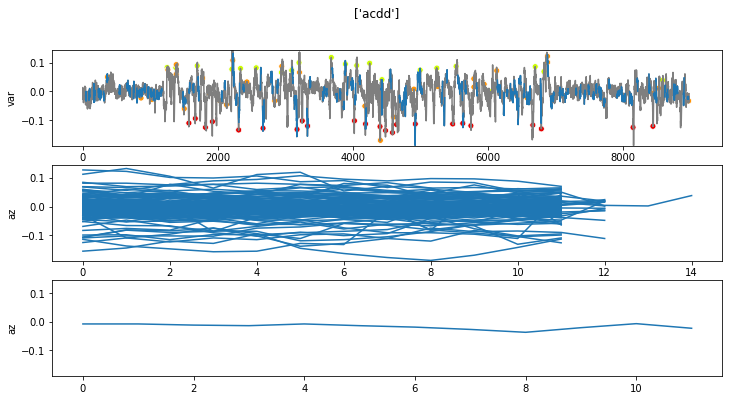

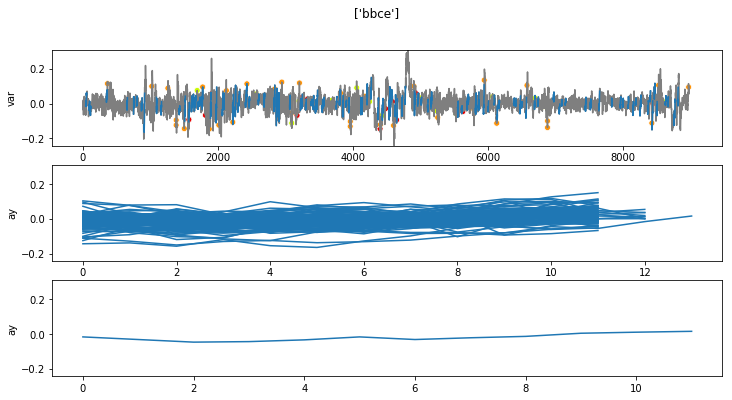

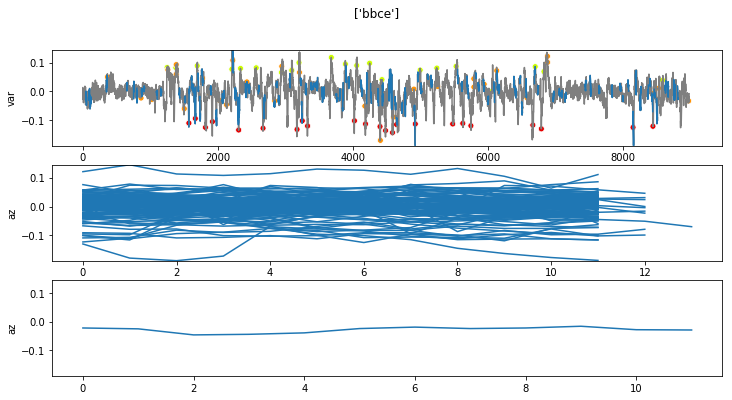

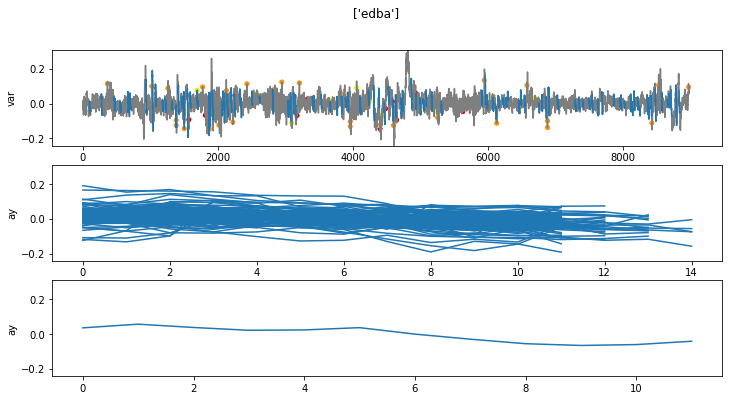

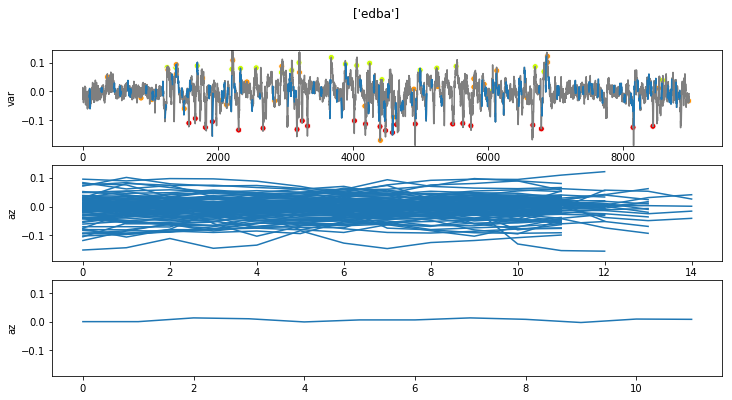

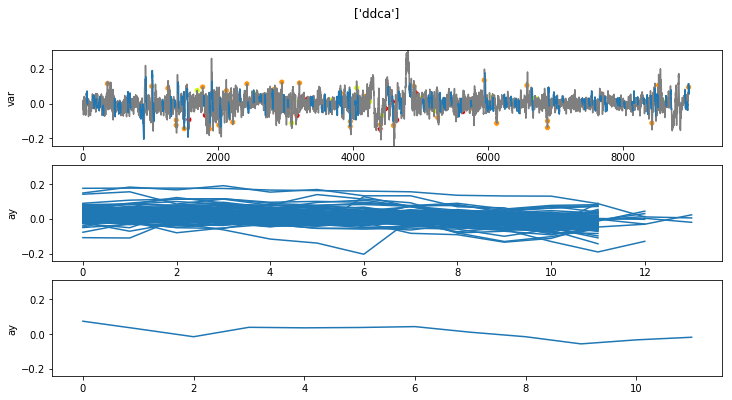

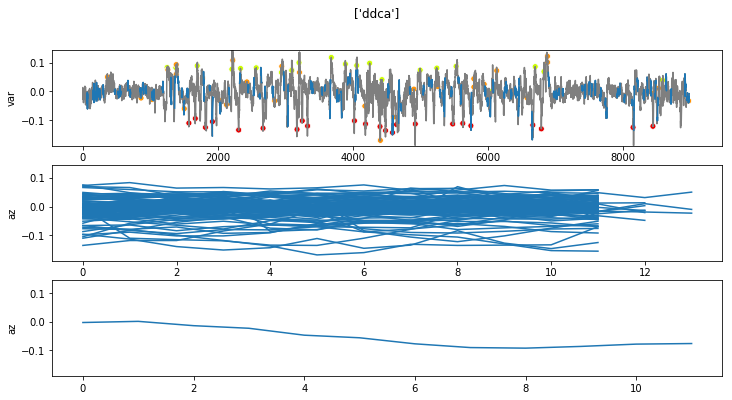

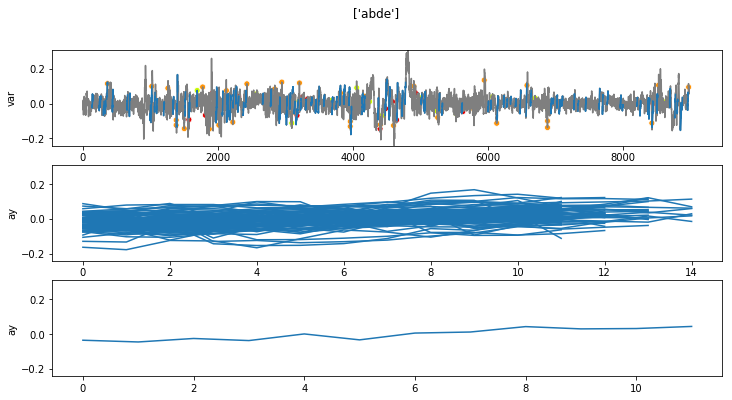

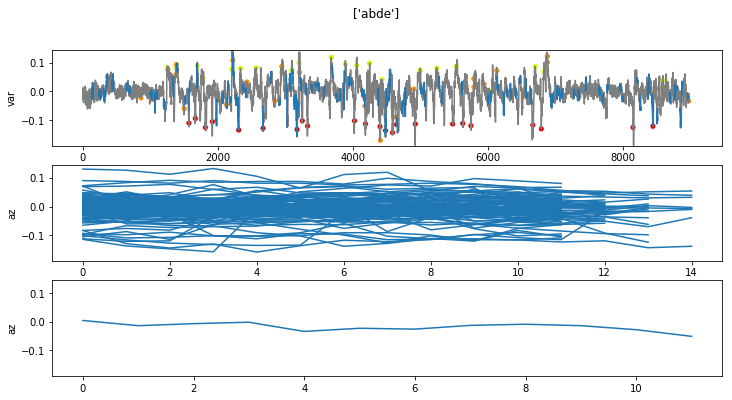

In [7]:
plot_k_multdim_motifs(5, multi_dim_ts, events_ts, mdl_cost_list, motif_point_list, motif_center_list, pattern_list)

***

## Experiment 2: Standard approach with fixed break point in the SAX transformation

In [8]:
folder = os.path.join(output_folder, 'trip_exp2')
ts_1d, mdl_cost_list, motif_point_list, motif_center_list, pattern_list, mean_dist = load_motif_data(folder)
df2 = create_motif_table(pattern_list, motif_point_list, mdl_cost_list, mean_dist)
df2.head(10)

,pattern,pattern_len,n_members,mdl_cost,mean_dist
323,[bccc],1,89,60869.6,0.044140
126,[cccc],1,86,61253.0,0.041465
5,[cccd],1,86,61526.1,0.046790
132,[ccbb],1,76,61912.6,0.048898
326,[ccdc],1,72,62234.1,0.047134
270,[cbbc],1,71,62335.8,0.049081
150,[bbcc],1,78,62436.8,0.051131
422,[cbcc],1,76,62450.8,0.047349
28,[cbbb],1,71,62514.2,0.052263
203,[ccdd],1,73,62633.7,0.046870


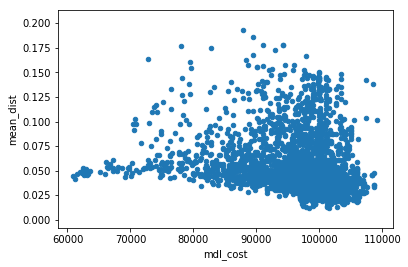

In [9]:
df2.plot.scatter('mdl_cost', 'mean_dist')
plt.show()

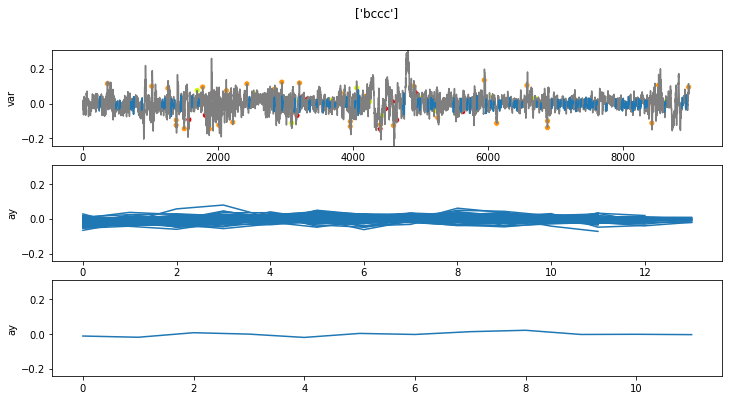

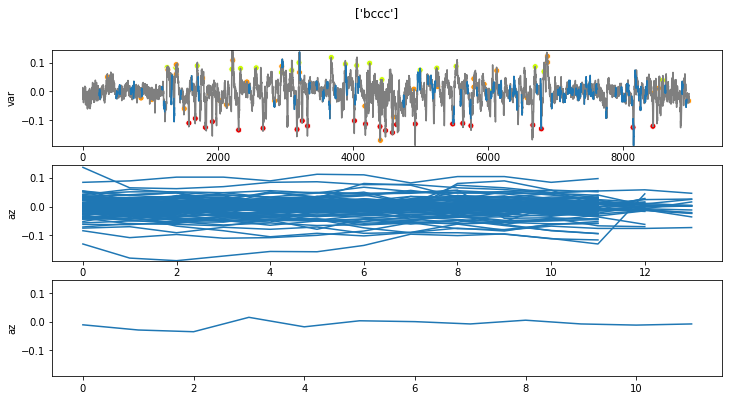

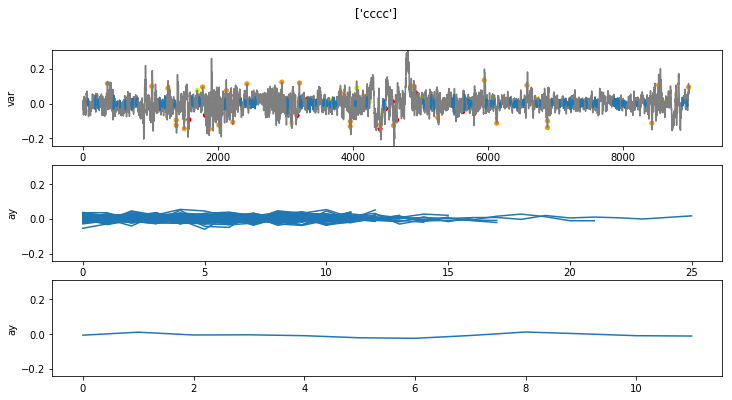

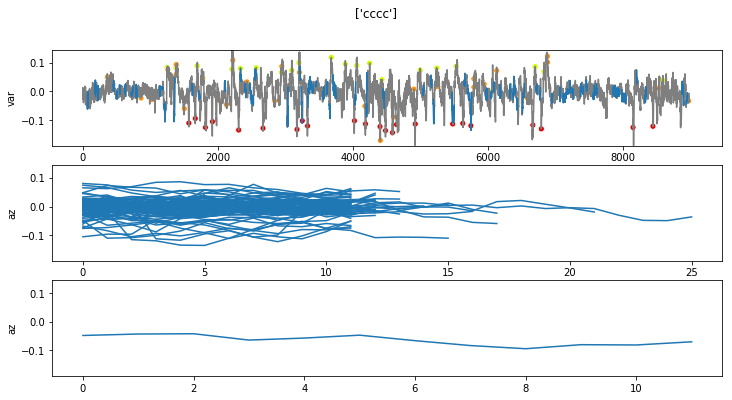

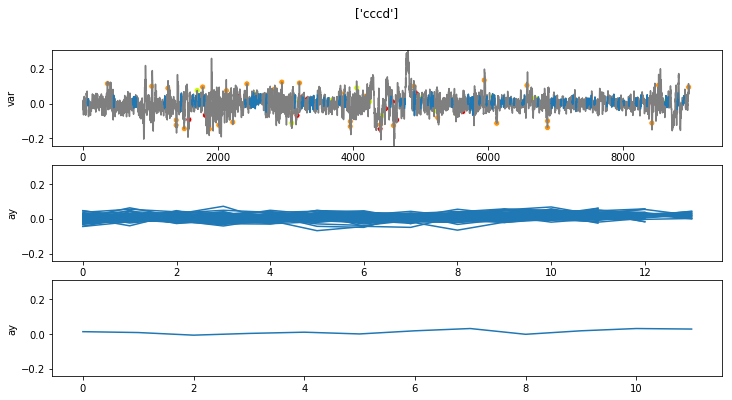

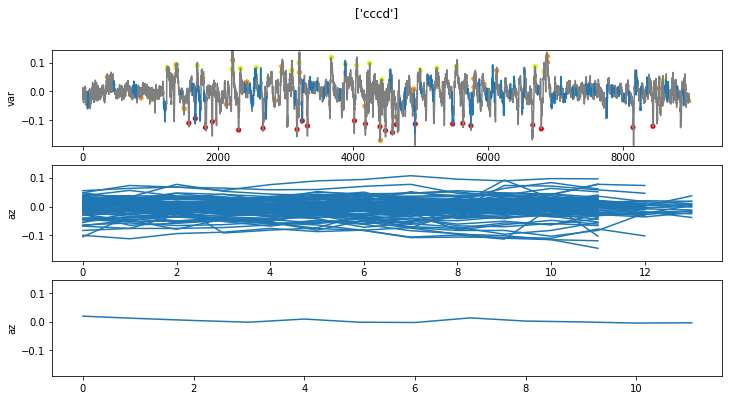

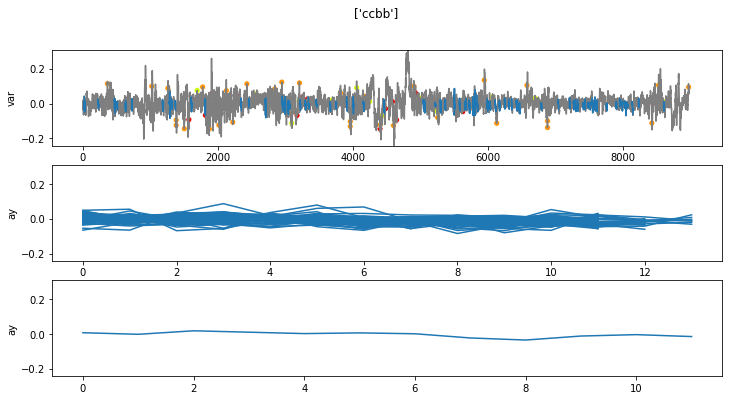

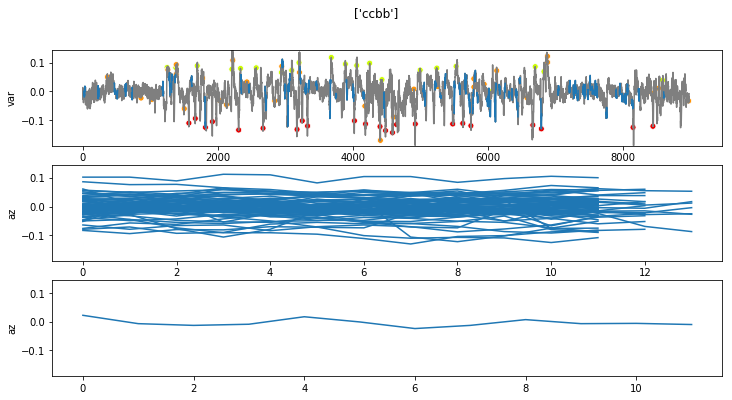

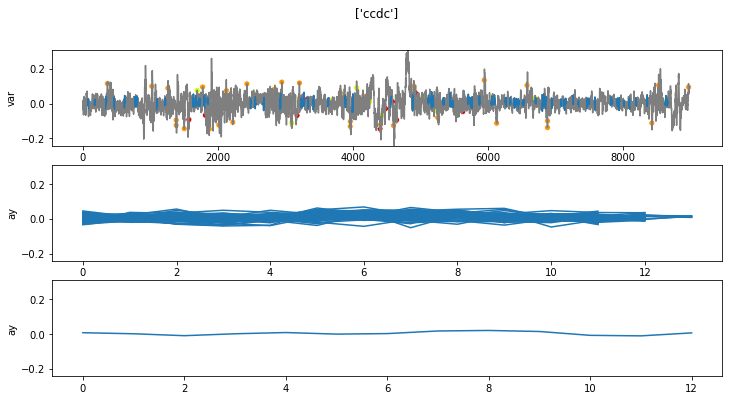

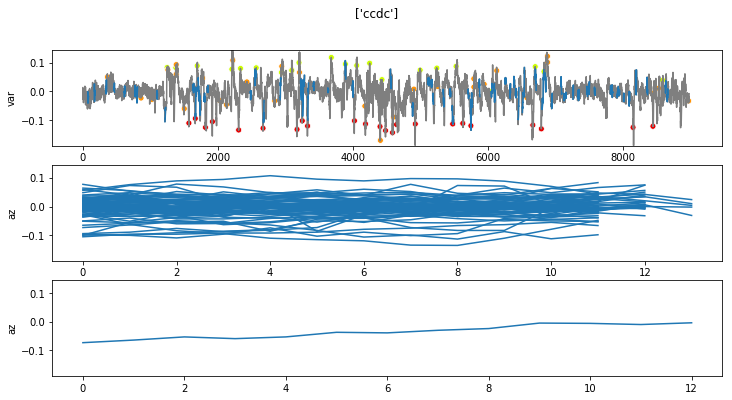

In [10]:
plot_k_multdim_motifs(5, multi_dim_ts, events_ts, mdl_cost_list, motif_point_list, motif_center_list, pattern_list)